# Heart Disease Classification

## Overview

The data science lifecycle is designed for big data issues and the data science projects. Generally, the data science project consists of seven steps which are problem definition, data collection, data preparation, data exploration, data modeling, model evaluation and model deployment.

In this project, I will go through these steps in order to build a heart disease classifier. To build the heart disease classifier by using [UCI heart disease](https://archive.ics.uci.edu/ml/datasets/statlog+(heart)) dataset. 


### Dataset

The dataset has 14 attributes:
 
* **age:** age in years.

* **sex:** sex (1 = male; 0 = female).

* **cp:** chest pain type (Value 0: typical angina; Value 1: atypical angina; Value 2: non-anginal pain; Value 3: asymptomatic).

* **trestbps:** resting blood pressure in mm Hg on admission to the hospital.

* **chol:** serum cholestoral in mg/dl.

* **fbs:** fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

* **restecg:** resting electrocardiographic results (Value 0: normal; Value 1: having ST-T wave abnormality; Value 2: probable or definite left ventricular hypertrophy).

* **thalach:** maximum heart rate achieved.

* **exang:** exercise induced angina (1 = yes; 0 = no)

* **oldpeak:** ST depression induced by exercise relative to rest.

* **slope:** the slope of the peak exercise ST segment (Value 0: upsloping; Value 1: flat; Value 2: downsloping).

* **ca:** number of major vessels (0-3) colored by flourosopy.

* **thal:** thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect).

* **target:** heart disease (1 = no, 2 = yes)


## Import Libraries

In [ ]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

import pickle

## 1. Data Preparation and Data Exploration

In [ ]:
# Read data in the excel file
df = pd.read_csv('data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [ ]:
df.shape

(270, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [ ]:
#Check null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df['target'].value_counts()

1    150
2    120
Name: target, dtype: int64

In [ ]:
# Percentage of patients have and do not have heart disease
df['target'].value_counts()/df.shape[0]*100 

1    55.555556
2    44.444444
Name: target, dtype: float64

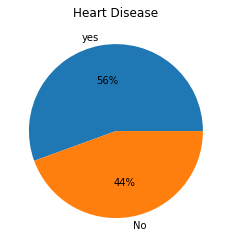

In [ ]:
# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['yes', 'No']
values = df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()


**Note:**

As you can see, the dataset contains 14 columns 5 of them are numerical values and 9 of them are categorical values. We can see also there are no missing values in this dataset. As for the data balancing, the data is relatively balanced, 56% of the persons in the dataset have heart disease.

## 3. Modeling

### 3.1. Prepare Data for Machine Learning

In [ ]:
# Initialize data and target
target = df['target']
features = df.drop(['target'], axis = 1)

In [ ]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

Here, I will use the below machine learning algorithms then I will select the best one based on its classification report.

* Support Vector Machine 
* Random Forest
* Gradient Boosting



### 3.2. Train and Evaluate Models

In [ ]:
# Train and evaluate model
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of classification report
    """
    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results
    

Maximum accuracy:- 0.7037037037037037 at K = 4


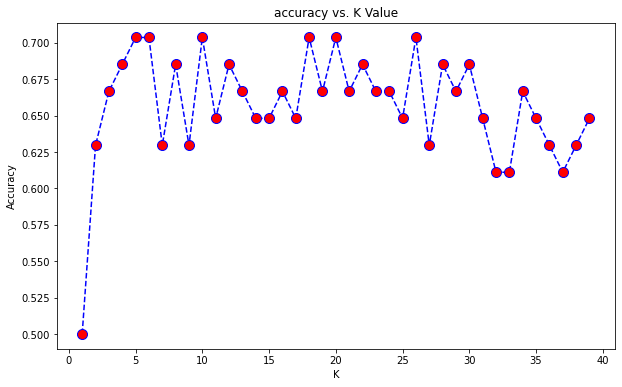

In [ ]:
acc = []
# Will take some time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.metrics import accuracy_score
from sklearn import metrics


# Initialize the models
sv = SVC(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
knn=KNeighborsClassifier(n_neighbors=4)

# Fit and evaluate models
results = {}
for cls in [sv, rf, knn]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)
    

#Try Error

In [ ]:
# Print classifiers results
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()

SVC

classification_report :
              precision    recall  f1-score   support

           1       0.71      0.90      0.79        30
           2       0.81      0.54      0.65        24

    accuracy                           0.74        54
   macro avg       0.76      0.72      0.72        54
weighted avg       0.76      0.74      0.73        54


confusion_matrix :
[[27  3]
 [11 13]]

-----

RandomForestClassifier

classification_report :
              precision    recall  f1-score   support

           1       0.76      0.73      0.75        30
           2       0.68      0.71      0.69        24

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.72      0.72      0.72        54


confusion_matrix :
[[22  8]
 [ 7 17]]

-----

KNeighborsClassifier

classification_report :
              precision    recall  f1-score   support

           1       0.68      0.83      0.75        30
           2       0

#### Selecting the Classifier
From the results, the best classifier is GradientBoostingClassifier. 



### 3.4. Save Model

 Finally, I will save the LogisticRegression model to use it later. 

In [ ]:
# Save the model as serialized object pickle
with open('modelsv.pkl', 'wb') as file:
    pickle.dump(sv, file)

with open('modelrf.pkl', 'wb') as file:
    pickle.dump(rf, file)

with open('modelknn.pkl', 'wb') as file:
    pickle.dump(knn, file)